# Gaussian Process Regression on Weather Data

We would like to interpolate renewable energy data, in particular some weather data that have different streams. We would like to interpolate or fit via a Gaussian process regression one of the parameters of the dataset. 

We divide this project in the following parts:

1. What is a Gaussian Process and what is a Gaussian Process Regression?
2. How do we make use of Gaussian Processes in supervised learning?
3. Practical usage of Gaussian Process in a Regression context.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn')

# What is a Gaussian Process and a Gaussian Process Regression?

We start by recalling few definitions.

**def**(*Normal random variable*). A random variable $X$ has a normal distribution with parameters $\mu$ and $\sigma$ and we write $N(\mu, \sigma)$ if either it has the following density

$$ p(x) = \frac{1}{\sqrt(2 \pi)  \sigma} \exp(-(x-\mu)^2 / 2 \sigma ^2) $$

or $P(X = \mu) = 1 $ almost surely $=> \sigma = 0$


**def**(Gaussian Vector). A random vector $X = (X_1, ..., X_n)$ is Gaussian $< = >$ for all $(\lambda_1, ..., \lambda_n) \in \mathbb{R}^n,$ $\sum_{k=1}^n \lambda_k X_k$ is normally distributed. 

**def**(Gaussian Process). A Gaussian Process (GP) is a collection of random variables $\{X_t : t \in S \}$ such that for any $(t_1, ..., t_l) \in S$, the corresponding random vector $(X_{t_1}, ..., X_{t_l})$ is a Gaussian Vector.


A Gaussian process regression (GPR) is a non-parametric, Bayesian statistical regression process. Loosely speaking a GPR tryes to infer a mathematical structure describing the relationships between individual observations even without prior knowledge of the parameters governing the system.


For Understanding how the GPR is built we need to understand a fundamental concept:

## The Conditional of a Gaussian.

Consider two random variables $x_1, x_2$ describing the inside temperature of a building and the outside temperature of the same building respectively. We can reasonably assume that these two random variables are positively correlated, indeed when the outside temperature is increasing, then most likely also the temperature inside the building does. Suppose that $(x_1, x_2)$ are joined together into a Gaussian Vector, then have Gaussian joint probability density $p(x_1, x_2).$ The countour plot of the joint distribution is an *ellipsoid* in the two dimensional plane.

So, if the temperature in $x_2$ is forecasted to be $12$ degrees Celsius for a particular day, then the temperature in $x_1$ takes a distribution of possible outcomes. The amplitude of this distribution is given by the correlation between the two variables. The lower the correlation the wider the distribution of possible outcomes. 

Text(0, 0.5, 'Inside Temperature')

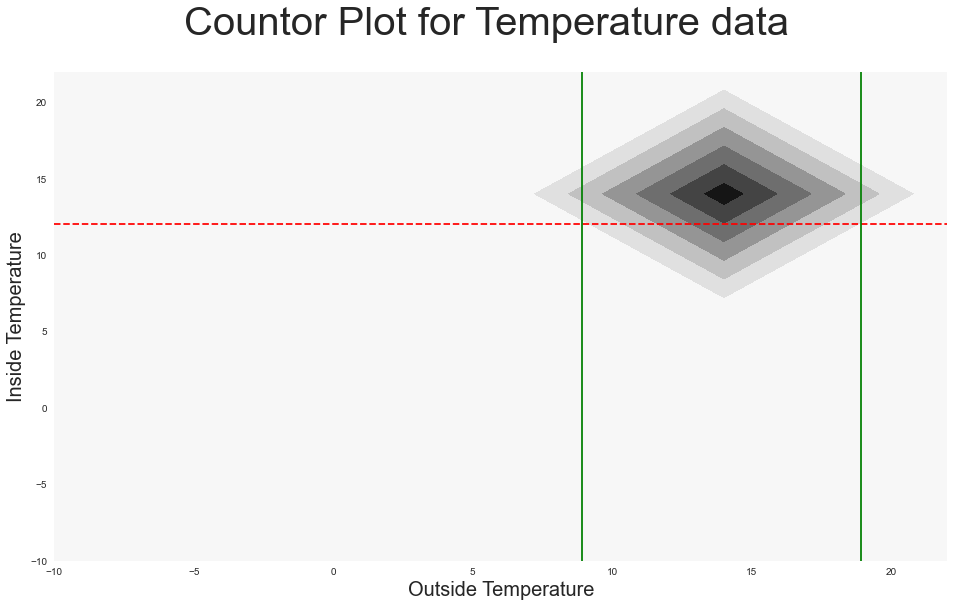

In [2]:
#Correlation of x1 and x2 at .66

x1 = np.linspace(-10,22, 5, endpoint = True)
x2 = np.linspace(-10,22, 5, endpoint = True)

X, Y = np.meshgrid(x1,x2)

rv = stats.multivariate_normal(mean = np.array([15, 18]),
                               cov = np.array([[1.0, 0.66], [0.66, 1.0]]))

pos = np.dstack((X,Y))

Z = rv.pdf(pos)

plt.figure(figsize = (16,9))

plt.suptitle('Countor Plot for Temperature data', fontsize = 40)

plt.contourf(X, Y, Z, color = 'goldenrod')
plt.axhline(12., linestyle = '--', color = 'r')
plt.axvline(8.9, color = 'g')
plt.axvline(18.9, color = 'g')


plt.xlabel('Outside Temperature', fontsize = 20)
plt.ylabel('Inside Temperature', fontsize = 20)



In that range of values there will be some values that are more likely to happen. So, our job is to find the probability of these point knowing that $x_2 = 12,$ namely we need to find the posterior conditional distribution of the Joint Gaussian distribution:

$$ p(x_1 | x_2 = 12) $$


A multivariate Gaussian is fully specified by its mean and covariance and the conditional of a Gaussian is also Gaussian. Therefore, all we need to specify for the posterior conditional distribution is the *new mean* and the *new covariance*. 

The following theorem provides us the solution for this problem.


**Theorem** Suppose $(x_1,x_2)$ is jointly Gaussian with parameters

$$ \mu = \begin{bmatrix}
    \mu_{1} \\
    \mu_{2} \\
    \end{bmatrix}, $$
    

$$ \Sigma = \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}, $$

$$ \Lambda = \Sigma^{-1} = \begin{bmatrix} \Lambda_{11} & \Lambda_{12} \\ \Lambda_{21} & \Lambda_{22} \end{bmatrix}. $$

Then, the posterior conditional is given by

$$ p(x_1 | x_2) = N(x_1 | \mu_{1|2}, \Sigma_{1|2}). $$

Where

$$ \mu_{1|2} = \mu_1 - \Lambda_{11}^{-1} \Lambda_{12} ( x_2 - \mu_2 ), $$

$$ \Sigma_{1|2} = \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21} $$


Below we have a numerical example to show that uncertainties of one variable are more likely to go down by observing one correlated variable.

Text(0, 0.5, 'Inside Temperature')

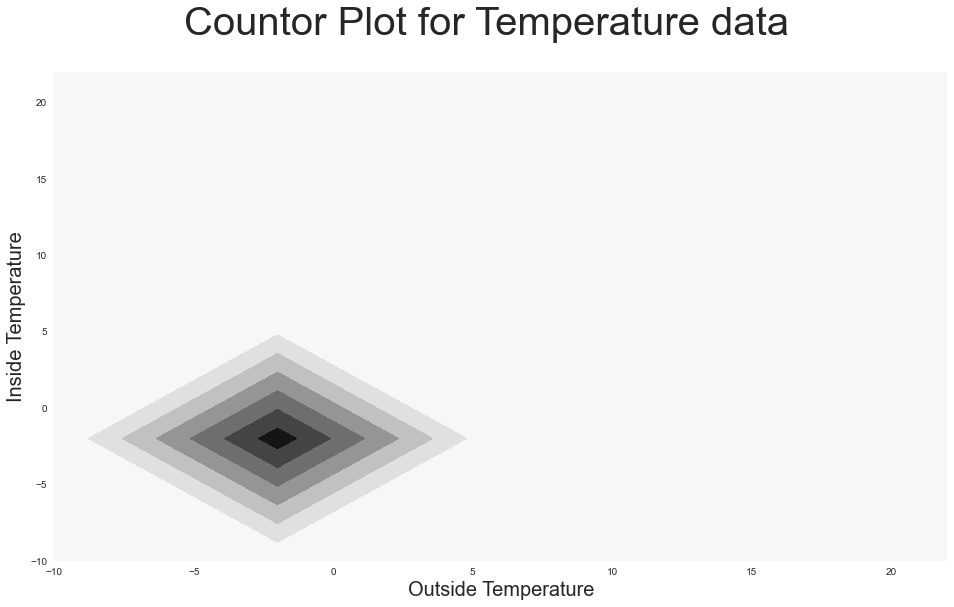

In [3]:
mean = [0,0]
cov = [[1., .95], [.95, 1.]]


x1 = np.linspace(-10,22, 5, endpoint = True)
x2 = np.linspace(-10,22, 5, endpoint = True)

X, Y = np.meshgrid(x1,x2)

rv = stats.multivariate_normal(mean = mean,
                               cov = cov)
pos = np.dstack((X,Y))

Z = rv.pdf(pos)

plt.figure(figsize = (16,9))

plt.suptitle('Countor Plot for Temperature data', fontsize = 40)

plt.contourf(X, Y, Z, color = 'goldenrod')

plt.xlabel('Outside Temperature', fontsize = 20)
plt.ylabel('Inside Temperature', fontsize = 20)



In [4]:
Z

array([[2.72775859e-023, 5.19205559e-148, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [5.19205559e-148, 6.55325923e-002, 6.95381511e-141,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 6.95381511e-141, 4.89298115e-009,
        2.89448779e-162, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 2.89448779e-162,
        1.13541470e-044, 3.74442454e-212],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.74442454e-212, 8.18842290e-109]])

In [6]:
#Suppose we have x2 = -1
#Using the Theorem we can compute the conditional mean and covariance
x1 = np.linspace(-10,22, 5, endpoint = True)
x2 = - 1
mu12 = mean[0] + cov[0][1]*(1/cov[1][1])*(x2 - mean[1])

cov12 = cov[0][0] - cov[0][1]*(1/cov[1][1])*cov[1][0] 

X, Y = np.meshgrid(x1,x2)

rv = stats.multivariate_normal(mean = mu12,
                               cov = cov12)
pos = np.dstack((X,Y))

Z = rv.pdf(x1)

#The Expected values for x1 are fewer, given x2 = -1, giving us a bit more
#certainty on x1

Z

array([4.97917603e-183, 4.47686060e-003, 3.38405521e-108, 0.00000000e+000,
       0.00000000e+000])

## Important Remark. 

A Gaussian Process is fully specified by two functions:

$$ m : \mathbb{R}_+ \longrightarrow \mathbb{R} $$
     
$$ k : \mathbb{R} \times \mathbb{R} \longrightarrow \mathbb{R}_+ $$


Called the mean and the covariance or kernel function. 

#  How do we make use of Gaussian Processes in supervised learning?

Assume a training set contains inputs $x_i$ and outputs $y_i$, related by an unknown function 
$f$, that is $y_i = f(x_i).$ Predictions or interpolations can be made after infering a distribution over functions, denoted as $p(f | X, y).$ Here, the key point is that we can find the probability of an output $y$ from a given input $x$ without even knowing the function that maps $x$ to $y$, and we do this by conditioning the process at a specific value where we are interested in finding the outputs.

Recall that for specifying a Gaussian Process it is sufficient to define a mean and covariance or kernel function. So in our training set we are going to specify a prior, namely

$$ f(x) \sim GP(m(x), k(x,x')). $$

By adapting the mean and the kernel to fit the physiscal problem at hand, the Gaussian process regression is optimised. The structure in the data is captured by the kernel function, by giving a measure of similarity between points in the dataset. These interrelations between different data points are stored in the covariance matrix. The kernel function contains hyperparameters, which are optimised based on the training set.

Let $D = \{(x_i, f_i), i = 1, ..., N \}$ be an observed training set, with $f_i = f(x_i)$ the noise-free observation of a function evaluated for $x_i.$ Suppose a test set $X_{*}$ of size $N_{*} \times D$ is given. The aim is to predict the function outputs $f_{*}$ based on the training set, $D$ and the test points $X_{*}.$ Putting it differently, we require the distribution $p(f_{*} | X_{*}, X, f).$ The mean and covariance of this latter will be recovered using the Theorem mentioned in the previous section.

**Wrapping up**

- Start with some observewd training set $D = \{(x_i, f_i), i = 1, ..., N \}$
- Set Prior, i.e. choiche of kernel: $ f(x) \sim GP(m(x), k(x,x')). $
- Improve fitting via optimization.
- Use the test set $ T = \{(x_{i*}, f_{i*}, i = N+1, ..., M\}$ and get the posterior distribution.
$p(f_{*} | X_{*}, X, f).$

## Type of Kernels and their use.

- Linear Kernel: is used for linear data structures, increasing variation and growing amplitude.

$$k(x,x') = \sigma_f^2 (x-c)\cdot(x'-c) $$
- Radial Basis Function: the closer are the datapoints, the more the kernel is closed to 1 indicating a larger similarity between x and x'. It is used for smoothness and for including local variation into the data.

$$ k(x,x') = \sigma_f^2 \exp \left(\frac{-(x-x')^2}{2l^2} \right) $$

- Rational Quadratic Function: provides a scale mixture, allowing the rational quadratic function to reresent an infinite sum of radial basis gunction with different length scale.

$$k(x,x') = \sigma_f^2 \left(1 + \frac{(x-x')}{2 \alpha l^2} \right)^{-\alpha} $$

- Periodic Kernel: well suited for function that have repetitive pattern.

$$k(x,x') = \sigma_f^2 \exp \left( \frac{-\sin^2(\pi/p \cdot (x-x'))}{2l^2} \right)$$

In [7]:
class Kernels():
    
    def __init__(self, x1, x2):
        
        self.x1 = x1
        self.x2 = x2
        
    def Linear(self, sigma_f, c):
        
        return (sigma_f**2) * (self.x1 - c)*(self.x2 - c)
    
    def Radial(self, sigma_f, l):
        
        diff2 = (self.x1 - self.x2)**2
        
        return (sigma_f**2) * np.exp(diff2 / 2*l**2)
    
    def Rational(self, sigma_f, l, alpha):
        
        return (sigma_f**2) * (1 + (self.x1 - self.x2)**2 / 2**alpha*l**2)**(-alpha)
    
    def Periodic(self, sigma_f, p, l):
        
        periodic = -np.sin((np.pi/p)*(self.x1 - self.x2))**2
        
        return sigma_f * np.exp(periodic / 2*l**2)
        

In [8]:
x1 = np.linspace(-10,22, 1000, endpoint = True)
x2 = np.linspace(-45,77, 1000, endpoint = True)

ker = Kernels(x1,x2)

Text(0.5, 1.0, 'Periodic Kernel')

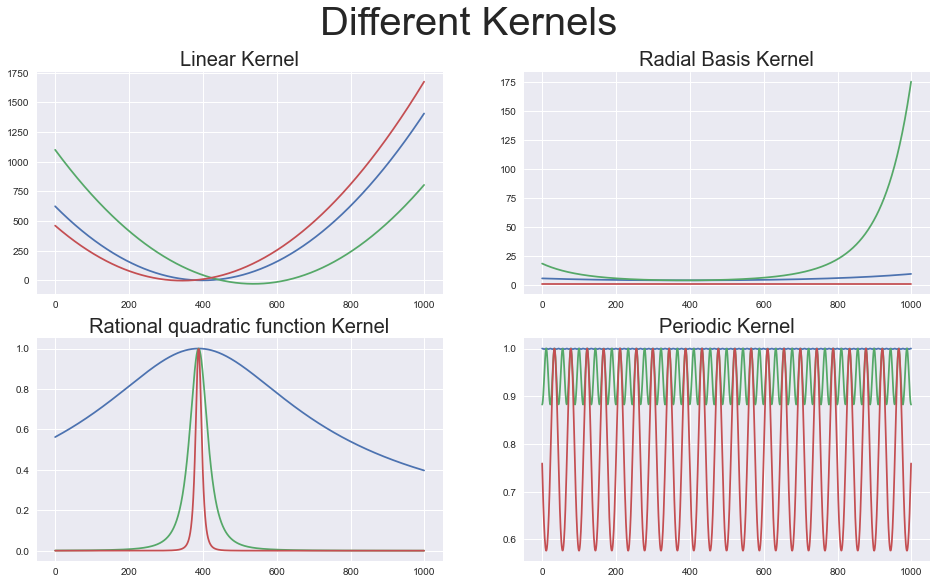

In [9]:
fig, axes = plt.subplots(2,2, figsize = (16,9))

fig.suptitle('Different Kernels', fontsize = 40)

axes[0,0].plot(ker.Linear(sigma_f = 1, c = 3), label = 'c = 3')
axes[0,0].plot(ker.Linear(sigma_f = 1, c = 10), label = 'c = 10')
axes[0,0].plot(ker.Linear(sigma_f = 1, c = 0.2), label = 'c = 0.2')
axes[0,0].set_title('Linear Kernel', fontsize = 20)

axes[0,1].plot(ker.Radial(sigma_f = 2, l = 0.024))
axes[0,1].plot(ker.Radial(sigma_f = 2, l = 0.05))
axes[0,1].plot(ker.Radial(sigma_f = 1, l = 0.0003))
axes[0,1].set_title('Radial Basis Kernel', fontsize = 20)

axes[1,0].plot(ker.Rational(sigma_f = 1, l = 0.05, alpha = 0.5))
axes[1,0].plot(ker.Rational(sigma_f = 1, l = 0.5, alpha = 1.5))
axes[1,0].plot(ker.Rational(sigma_f = 1, l = 1.5, alpha = 2))
axes[1,0].set_title('Rational quadratic function Kernel', fontsize = 20)

axes[1,1].plot(ker.Periodic(sigma_f = 1, p= 1, l = 0.05))
axes[1,1].plot(ker.Periodic(sigma_f = 1, p= 2, l = 0.5))
axes[1,1].plot(ker.Periodic(sigma_f = 1, p= 4, l = 1.05))
axes[1,1].set_title('Periodic Kernel', fontsize = 20)

# Practical Use of Gaussian Process on a real world dataset.


- Univariate Case: We will try to interpolate the sunspots activity over the years
- Multivariate Case: We will try to interpolate some weather data activity.

In [10]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin
from sklearn.gaussian_process import GaussianProcessRegressor

from statsmodels.tsa.seasonal import seasonal_decompose


## Univariate Case

In [11]:
df = pd.read_csv('sunspots.csv')
df.set_index('YEAR', inplace = True)

<AxesSubplot:xlabel='YEAR'>

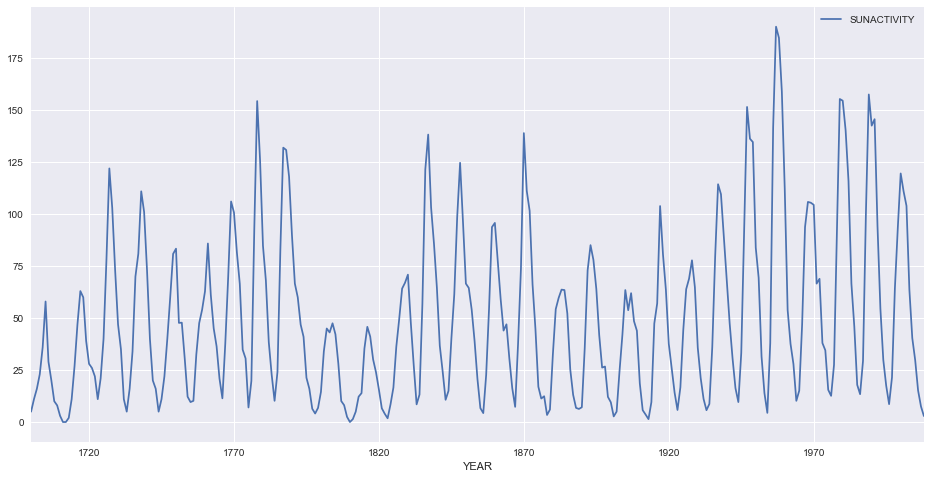

In [12]:
df.index = pd.to_datetime(df.index, format = '%Y')
df.plot(figsize = (16,8), grid = True)


<Figure size 1152x1440 with 0 Axes>

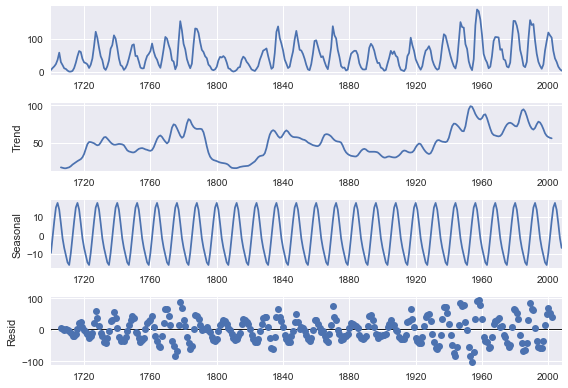

In [13]:
decomposition = seasonal_decompose(df, period = 12)
plt.figure(figsize = (16,20))
decomposition.plot()
plt.show()

The time series presents a strong seasonality of period 12 and some evident residuals. There is no relevant trend on the overall time series.

In [14]:
df = pd.read_csv('sunspots.csv')

df_array = np.asarray(df)


year = df_array[0:120, 0]
sun_activity = df_array[0:120, 1]

#output of training set
y = np.array(sun_activity).T

#training set

X = np.atleast_2d(list(range(len(year)))).T.astype(float)

#test set

x = np.atleast_2d(np.linspace(1, 120, 10000)).T


In [15]:
#Instantiate a Gaussian Process Model

kernel_superposition = RBF(length_scale = 24, length_scale_bounds = (1e-5,2)) + Exp(length_scale = 24, periodicity = 12) + RQ(length_scale=24, alpha = 1)

gp = GaussianProcessRegressor(kernel = kernel_superposition, n_restarts_optimizer=100)

gp.fit(X,y)

y_pred_1, sigma_1 = gp.predict(x, return_std = True)

In [16]:
#Instantiate a Gaussian Process Model

kernel_compound = RBF(length_scale = 24, length_scale_bounds = (1e-5,2)) + Exp(length_scale = 24, periodicity = 12) * RQ(length_scale=24, alpha = 1)

gp = GaussianProcessRegressor(kernel = kernel_compound, n_restarts_optimizer=100)

gp.fit(X,y)

y_pred_2, sigma_2 = gp.predict(x, return_std = True)

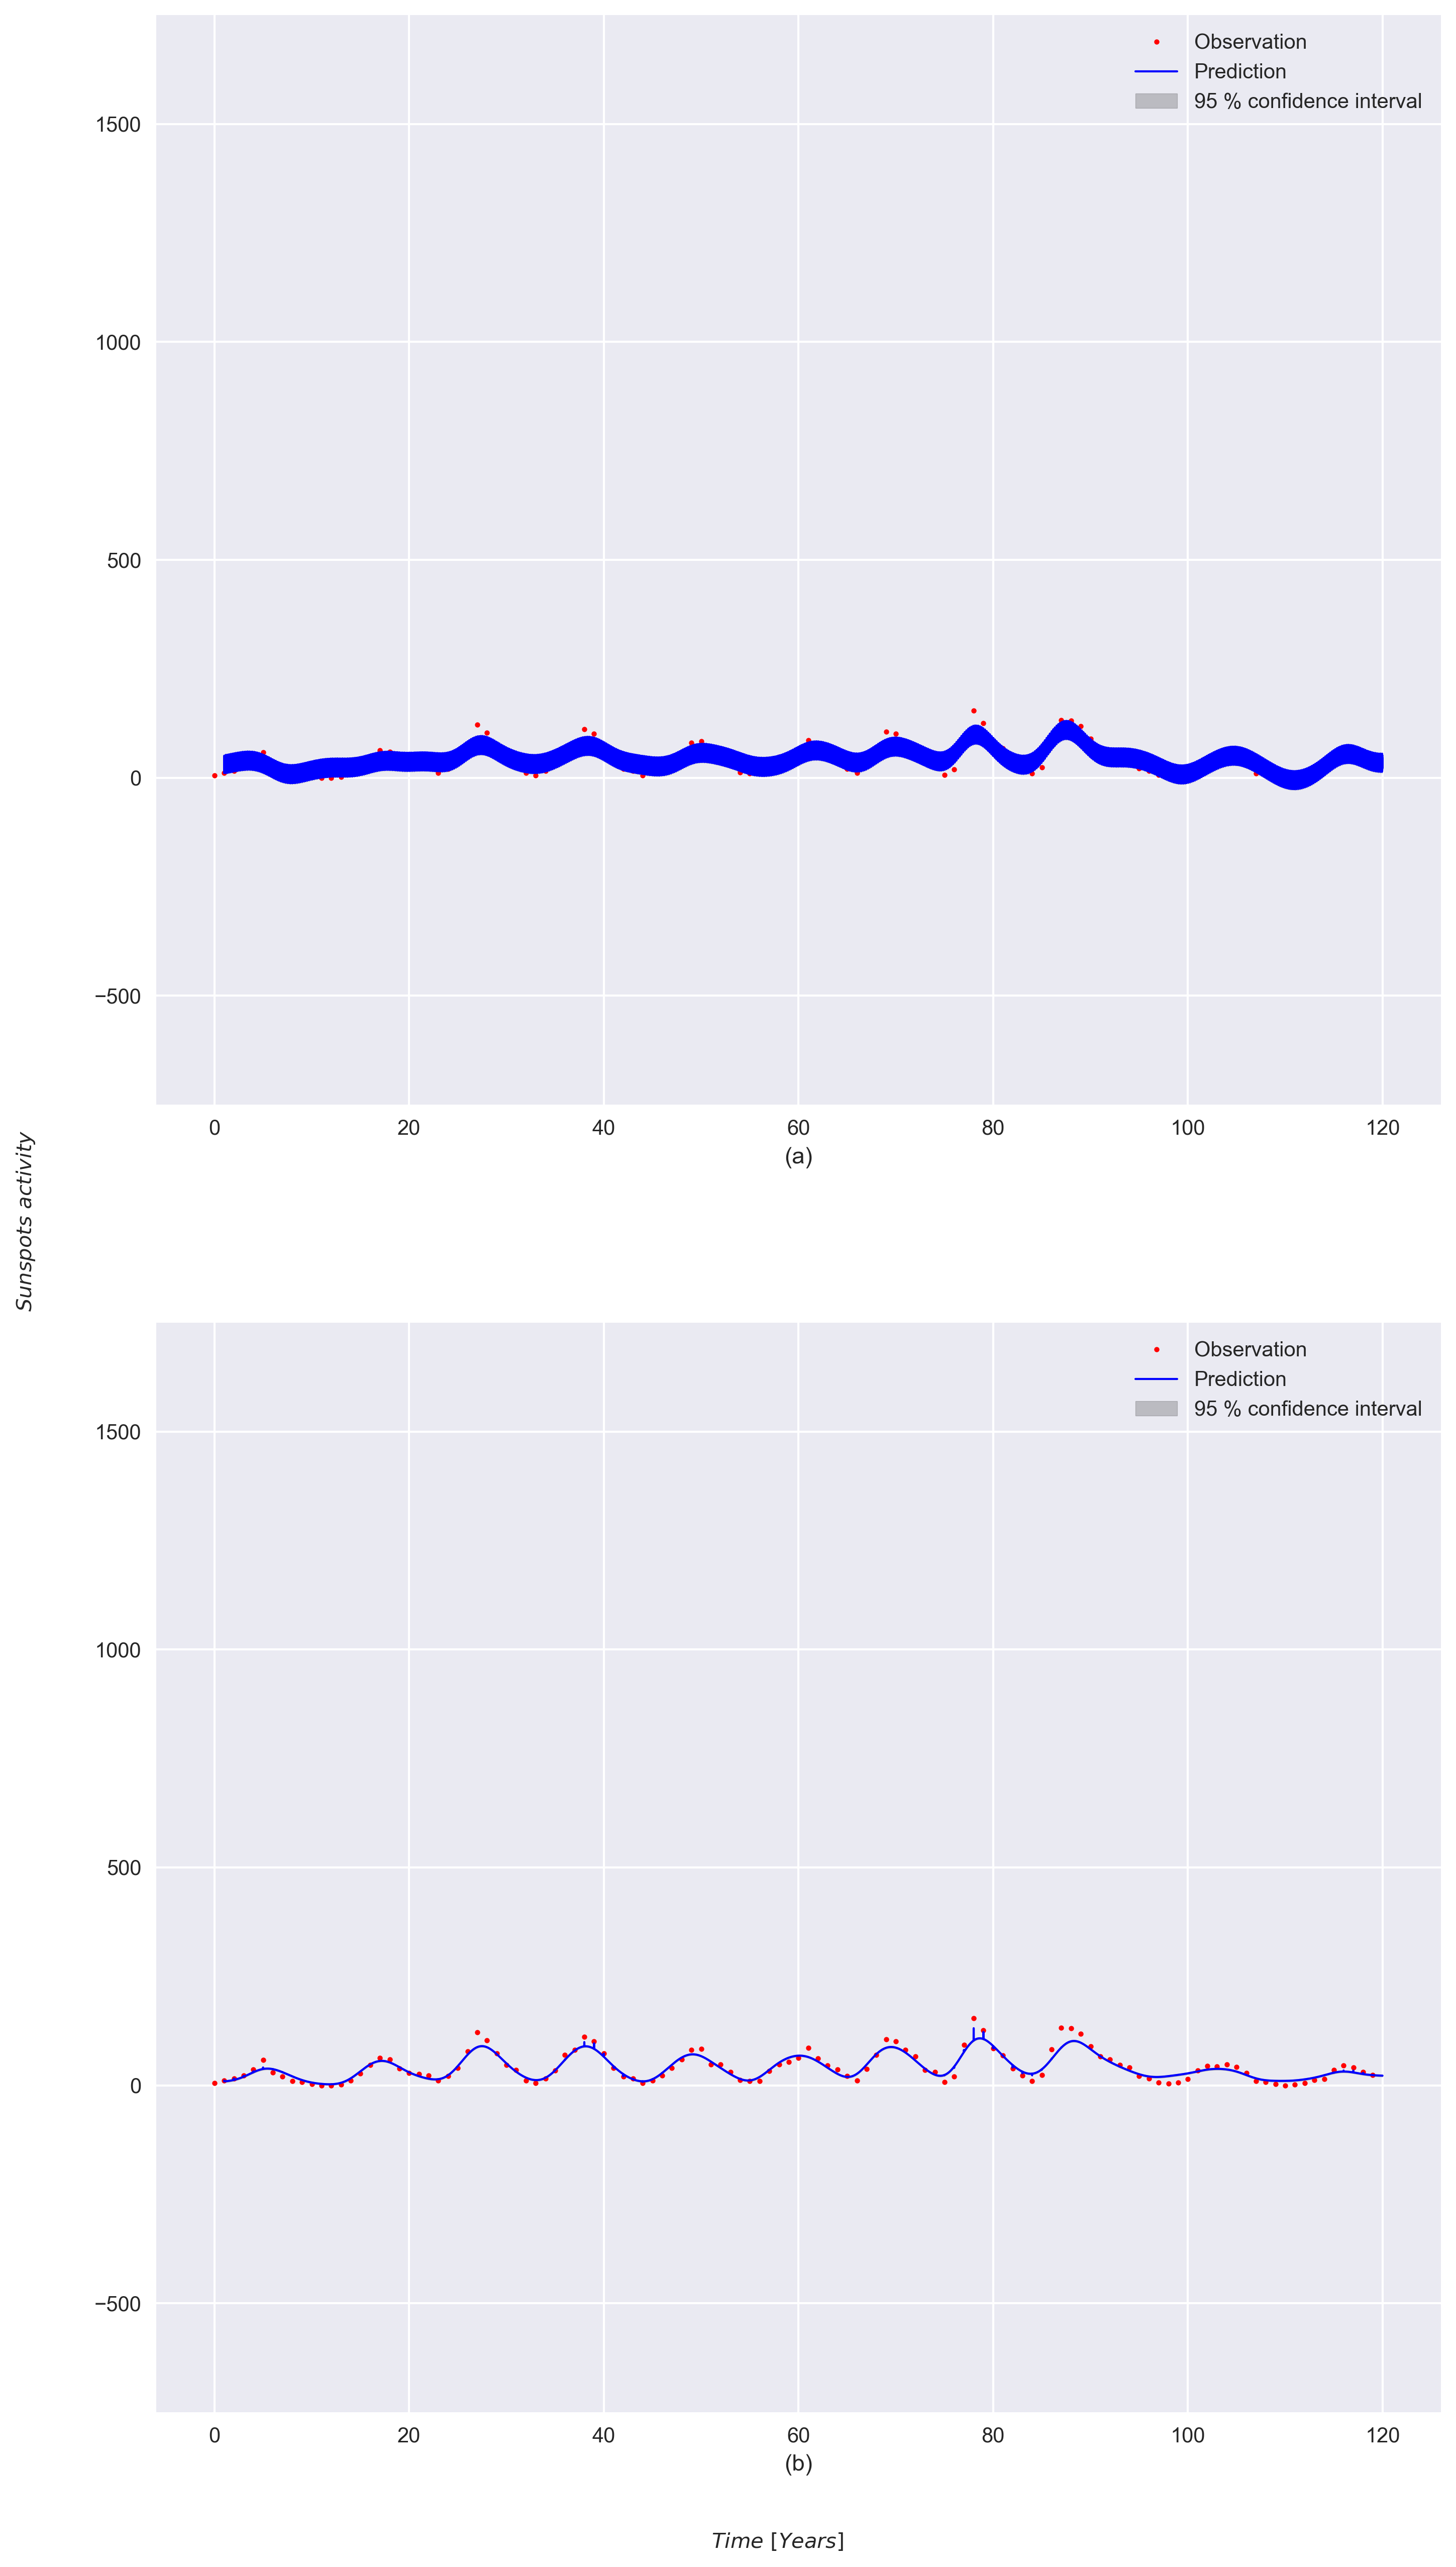

In [17]:
#Plot figure
fig = plt.figure(
    num=1, figsize=(11, 0.8), dpi=300, facecolor='w', edgecolor='k')
fig.text(0.5, -1, '$Time\ [Years]$', ha='center')
fig.text(
    0.04,
    10,
    '$Sunspots \ activity$',
    va='center',
    rotation='vertical')

plt.subplot(2, 1, 1)
plt.plot(X, y, 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_1, 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_1 - 2 * sigma_1,
    y_pred_1 + 2 * sigma_1,
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(a)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)

plt.subplot(2, 1, 2)
plt.plot(X, y, 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_2, 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_2 - 2 * sigma_2,
    y_pred_2 + 2 * sigma_2,
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(b)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)

plt.subplots_adjust(top=20)

## Multivariate Case

In [18]:
df = pd.read_excel('weather_data.xlsx')

df_array = np.asarray(df)

rec_num = df_array[0:177, 0]
ghi = df_array[0:177, 1]
DNI = df_array[0:177, 2]
DHI = df_array[0:177, 3]
DHI_shadowband = df_array[0:177, 4]
UVA = df_array[0:177, 5]
UVB = df_array[0:177, 6]
air_temp = df_array[0:177, 7]
BP = df_array[0:177, 8]
RH = df_array[0:177, 9]
WS = df_array[0:177, 10]
WD = df_array[0:177, 11]
WD_SD = df_array[0:177, 12]

#output of training set
y = np.array([ghi, DNI, DHI, DHI_shadowband,
              UVA, UVB, air_temp, BP, RH, 
              WS, WD, WD_SD]).T

#At each point there is a certain timesteps
X = np.atleast_2d([list(range(1,178))]).T.astype(float)

#test set

x = np.atleast_2d(np.linspace(1, 177, 10739)).T


In [19]:
#Instantiate a Gausssian Process Model

kernel = C() * Exp(length_scale = 24, periodicity = 1)

gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=4)

gp.fit(X,y)

y_pred_1, sigma_1 = gp.predict(x, return_std = True)

In [20]:
#Instantiate a Gaussian Process Model

kernel = C() * RQ(length_scale=24, alpha = 1)

gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=4)

gp.fit(X,y)

y_pred_2, sigma_2 = gp.predict(x, return_std = True)

In [21]:
#Instantiate a Gaussian Process Model

kernel = C() * RQ(length_scale=24, alpha = 0.5, length_scale_bounds=(1e-05,2)) * Exp(length_scale = 24, periodicity = 1)

gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=100)

gp.fit(X,y)

y_pred_3, sigma_3 = gp.predict(x, return_std = True)

In [22]:
#Instantiate a Gaussian Process Model

kernel = C() * RQ(length_scale=24, alpha = 0.5, length_scale_bounds=(1e-05,2)) * RBF(length_scale = 24, length_scale_bounds = (1e-5,2)) + Exp(length_scale = 24, periodicity = 1)

gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=4)

gp.fit(X,y)

y_pred_4, sigma_4 = gp.predict(x, return_std = True)

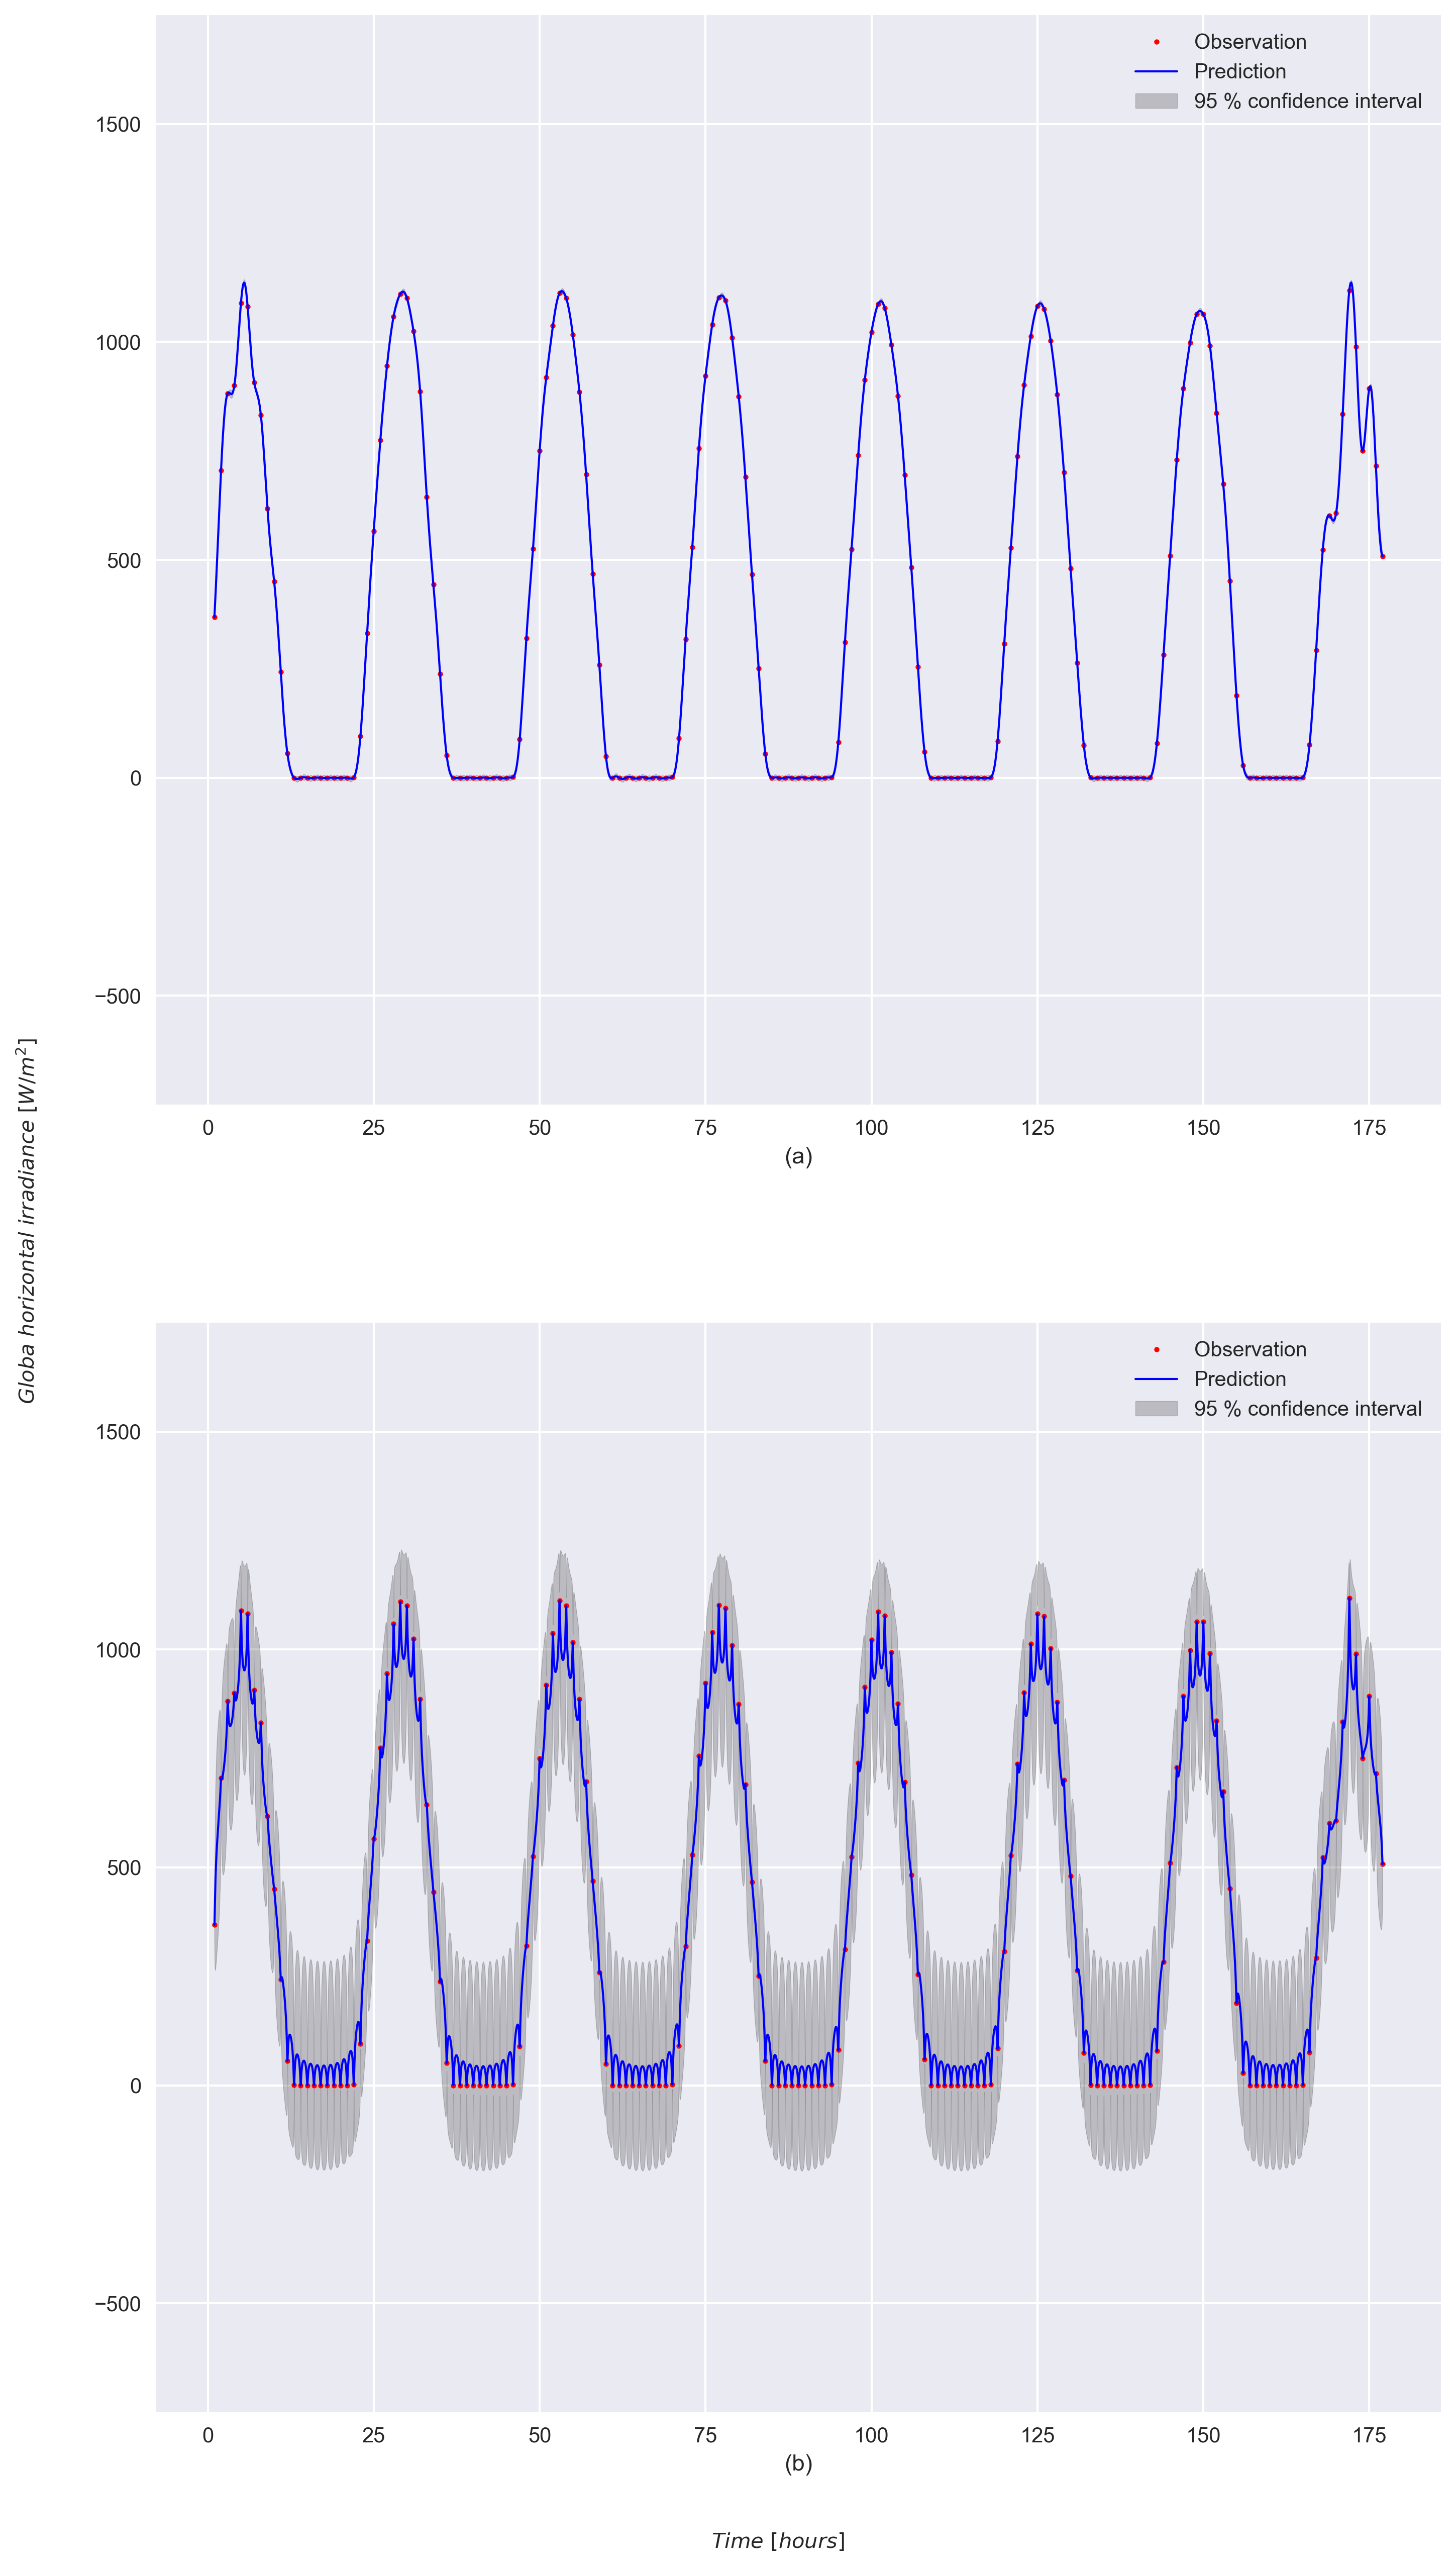

In [23]:
#Plot figure
fig = plt.figure(
    num=1, figsize=(11, 0.8), dpi=300, facecolor='w', edgecolor='k')
fig.text(0.5, -1, '$Time\ [hours]$', ha='center')
fig.text(
    0.04,
    10,
    '$Globa\ horizontal\ irradiance\ [W/m^2]$',
    va='center',
    rotation='vertical')

plt.subplot(2, 1, 1)
plt.plot(X, y[:, 0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_1[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_1[:, 0] - 1.96 * sigma_1,
    y_pred_1[:, 0] + 1.96 * sigma_1,
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(a)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)

plt.subplot(2, 1, 2)
plt.plot(X, y[:, 0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_2[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_2[:, 0] - 1.96 * sigma_2,
    y_pred_2[:, 0] + 1.96 * sigma_2,
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(b)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)

plt.subplots_adjust(top=20)